In [75]:
pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [77]:
df=pd.read_csv('/content/preprocessed_matches_by_teams.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10594 entries, 0 to 10593
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          10594 non-null  int64  
 1   match_id                            10594 non-null  object 
 2   color                               10594 non-null  object 
 3   team_id                             10594 non-null  object 
 4   team_slug                           10594 non-null  object 
 5   team_name                           10594 non-null  object 
 6   team_region                         10594 non-null  object 
 7   core_shots                          8708 non-null   float64
 8   core_goals                          8708 non-null   float64
 9   core_saves                          8708 non-null   float64
 10  core_assists                        8708 non-null   float64
 11  core_score                          8708 

**Ranking Points**

In [78]:
df['team_region'].unique()

array(['Oceania', 'North America', 'Asia-Pacific South',
       'Middle East & North Africa', 'Europe', 'South America',
       'Asia-Pacific North', 'Sub-Saharan Africa'], dtype=object)

In [79]:
# Group the data by team
grouped = df.groupby(['team_name'])

# Calculate the total matches played and won for each team
matches_played = grouped.count()['winner'].astype(bool).sum()
matches_won = grouped.sum()['winner'].astype(bool).sum()

# Create a new dataframe to store the results
# results = pd.DataFrame({'team_name': matches_played.index,
#                         'matches_played': matches_played.values,
#                         'matches_won': matches_won.values})

# The final dataframe will contain the team name, number of matches played, and number of matches won
matches_played


<ipython-input-79-bbd4569ea99f>:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



647

              team_name  matches_played  matches_won
0                  +966               7            3
1             00 NATION              69           32
2            01 ESPORTS              19           10
3            1620 KINGS              54           28
4           1NE ESPORTS              18           13
..                  ...             ...          ...
551     YOU'RE THROWING              45           18
552               ZBURA               4            1
553  ZINGER BOX BANDITS               4            1
554               ZNTRA              16            9
555        ZOOM N' BOOM               5            3

[556 rows x 3 columns]


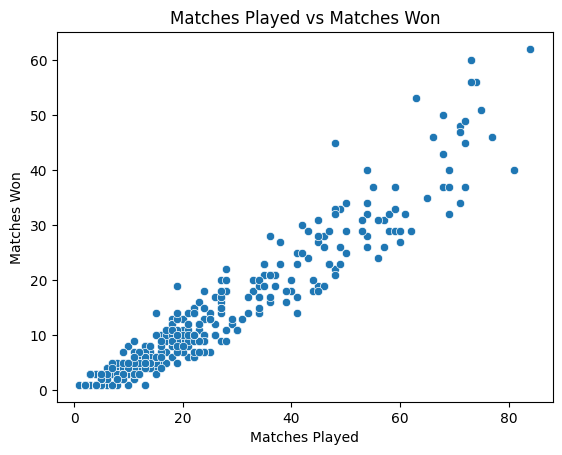

In [80]:
team_counts = df.groupby(['team_name'])['match_id'].nunique().reset_index(name='matches_played')
team_wins = df[df['winner']==True].groupby(['team_name'])['match_id'].nunique().reset_index(name='matches_won')

# Merge the two dataframes on team_name
team_results = pd.merge(team_counts, team_wins, on='team_name')
print(team_results)
# Plot the data
sns.scatterplot(x='matches_played', y='matches_won', data=team_results)
plt.xlabel('Matches Played')
plt.ylabel('Matches Won')
plt.title('Matches Played vs Matches Won')
plt.show()

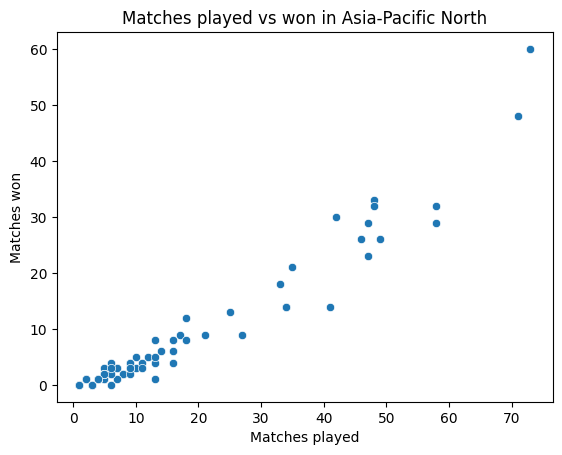

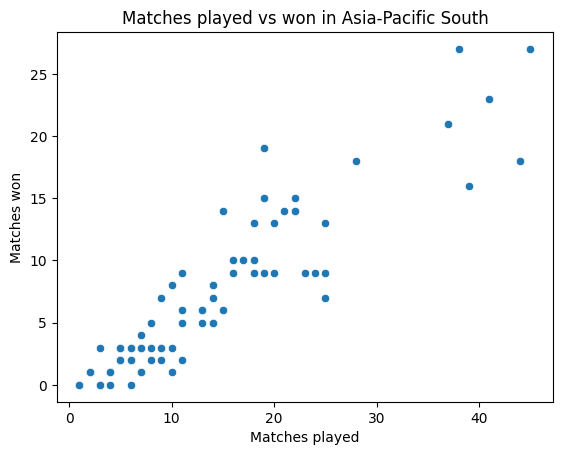

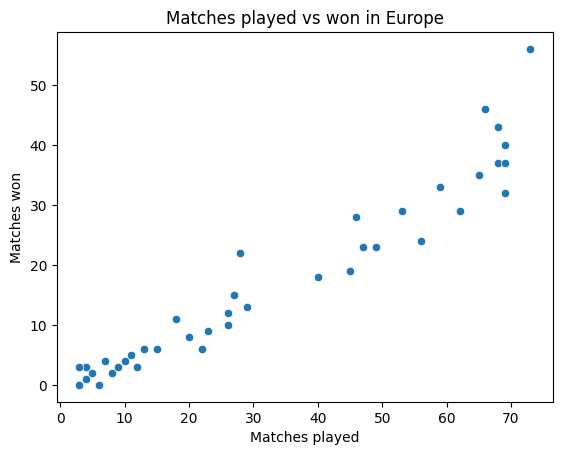

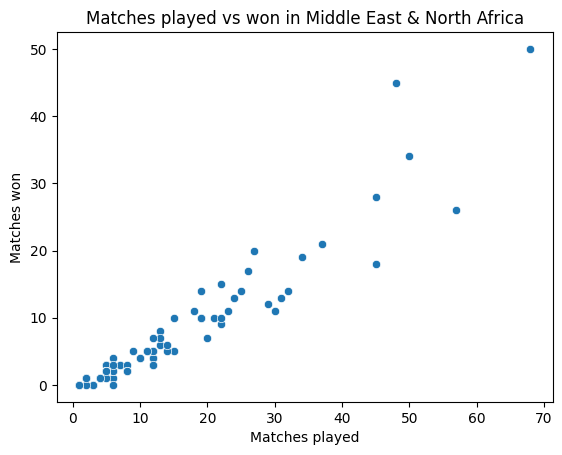

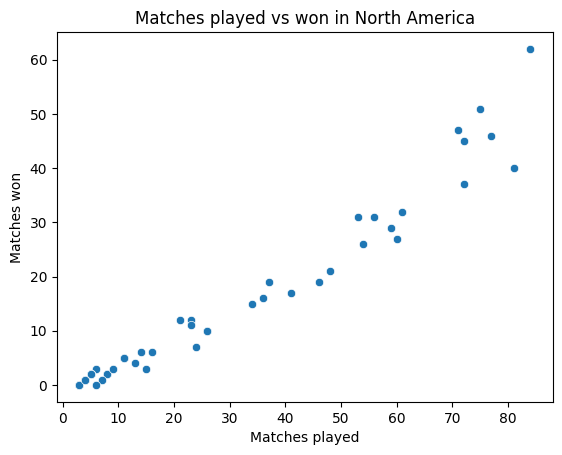

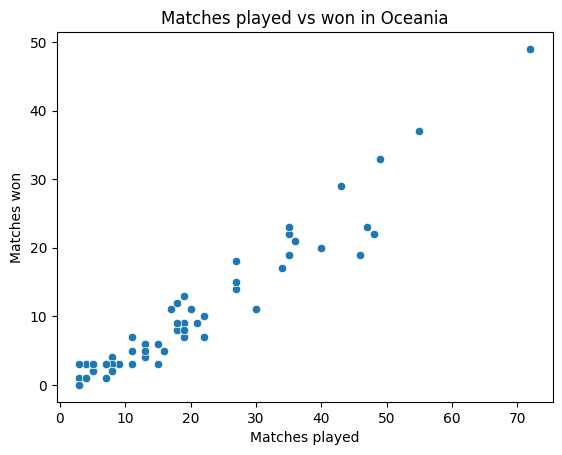

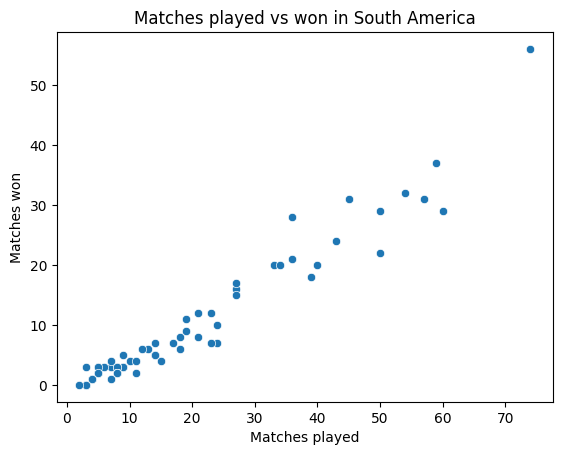

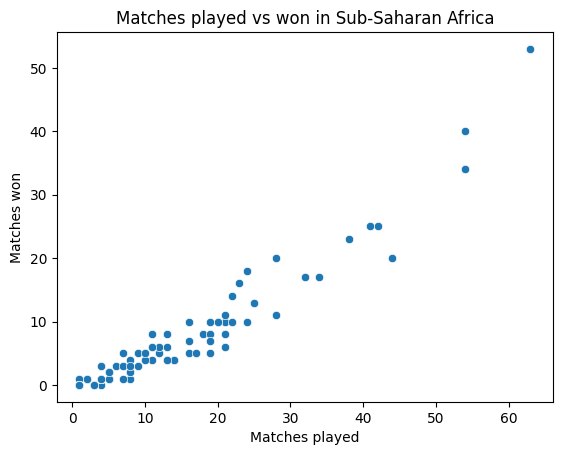

In [81]:
# Group data by region and team
grouped = df.groupby(['team_region', 'team_name'])

# Count number of matches played and matches won for each team in each region
played = grouped['match_id'].count().reset_index(name='played')
won = grouped.apply(lambda x: x[x['winner'] == True]['match_id'].count()).reset_index(name='won')

# Merge two dataframes on team_region and team_name
result = played.merge(won, on=['team_region', 'team_name'])

# Plot graph for each region
regions = result['team_region'].unique()
for region in regions:
    region_data = result[result['team_region'] == region]
    plt.figure()
    sns.scatterplot(x='played', y='won', data=region_data)
    plt.title(f'Matches played vs won in {region}')
    plt.xlabel('Matches played')
    plt.ylabel('Matches won')

plt.show()

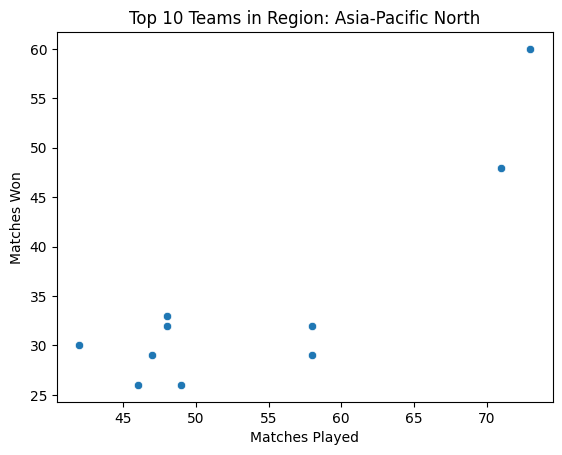

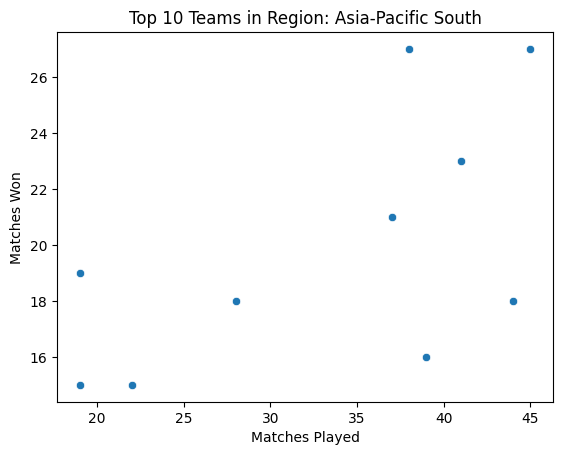

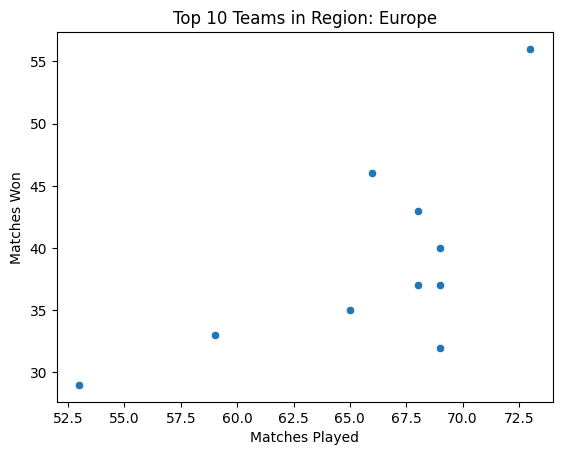

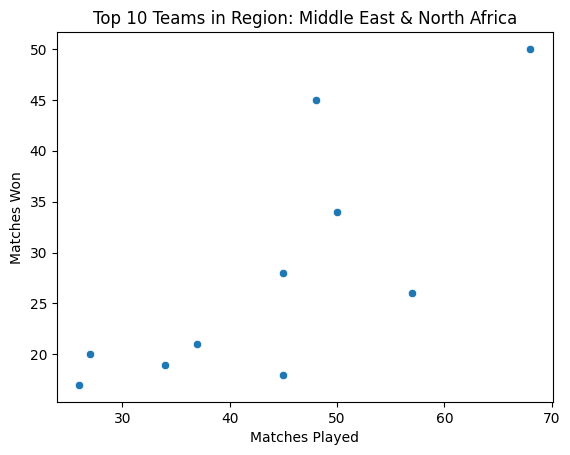

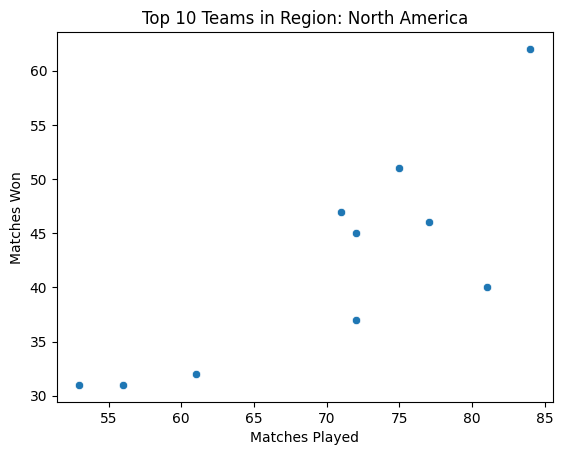

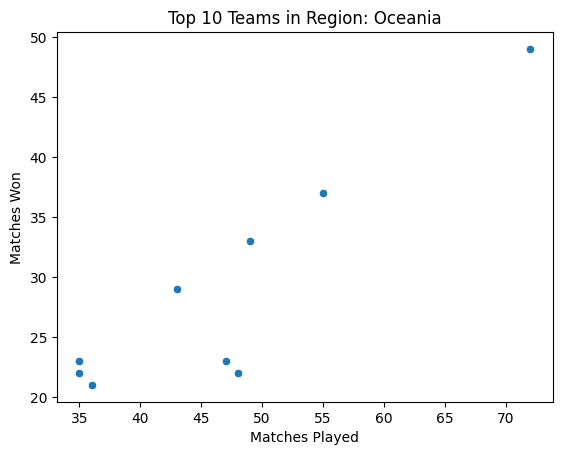

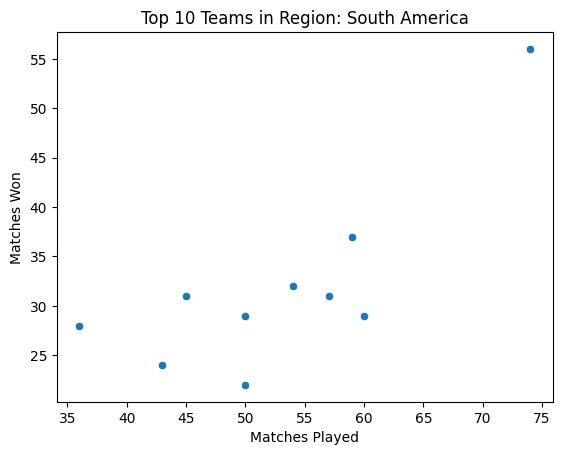

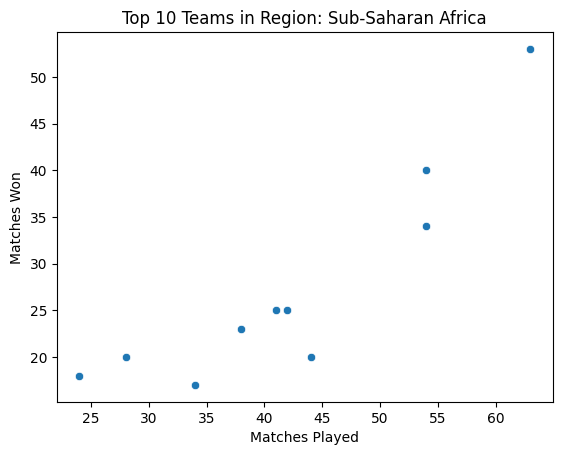

In [82]:


def plot_matches_vs_wins(df):
    # Group data by region and team name, and calculate number of matches played and won
    grouped = df.groupby(['team_region', 'team_name'])
    matches_played = grouped.size().reset_index(name='matches_played')
    matches_won = grouped['winner'].sum().reset_index(name='matches_won')

    # Merge the two dataframes to get both matches played and won for each team
    team_data = matches_played.merge(matches_won, on=['team_region', 'team_name'])

    # Sort by region and matches won
    team_data = team_data.sort_values(by=['team_region', 'matches_won'], ascending=[True, False])

    # Get the top 10 teams for each region
    top_10 = team_data.groupby('team_region').head(10)

    # Plot matches played vs matches won for each team in each region
    regions = top_10['team_region'].unique()
    for region in regions:
        region_data = top_10[top_10['team_region'] == region]
        sns.scatterplot(x='matches_played', y='matches_won', data=region_data)
        plt.title(f"Top 10 Teams in Region: {region}")
        plt.xlabel("Matches Played")
        plt.ylabel("Matches Won")
        plt.show()

plot_matches_vs_wins(df)


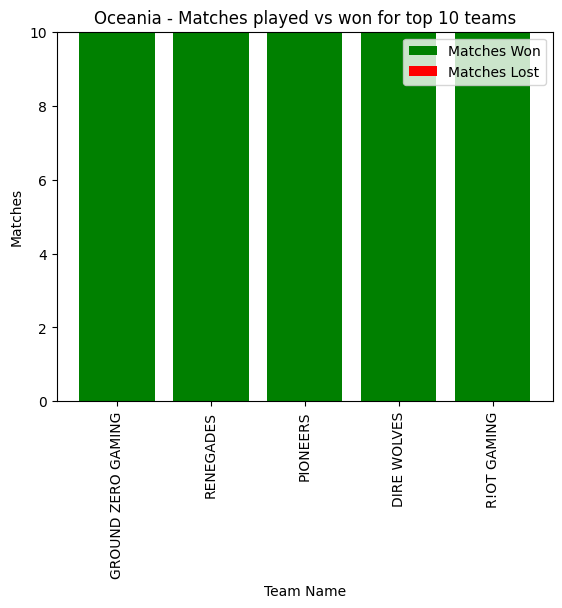

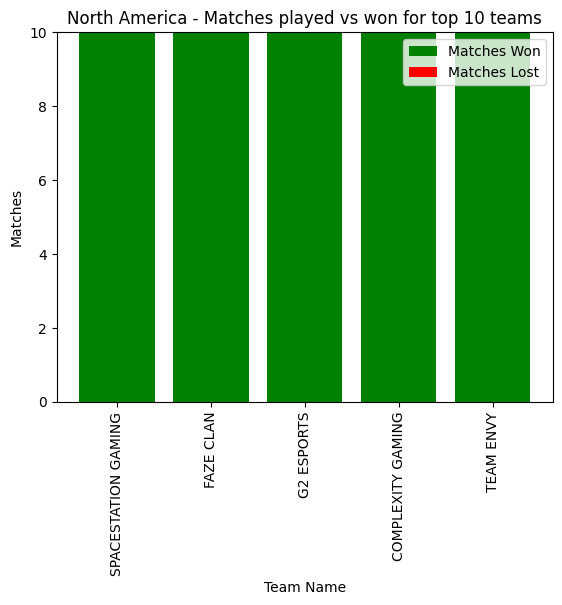

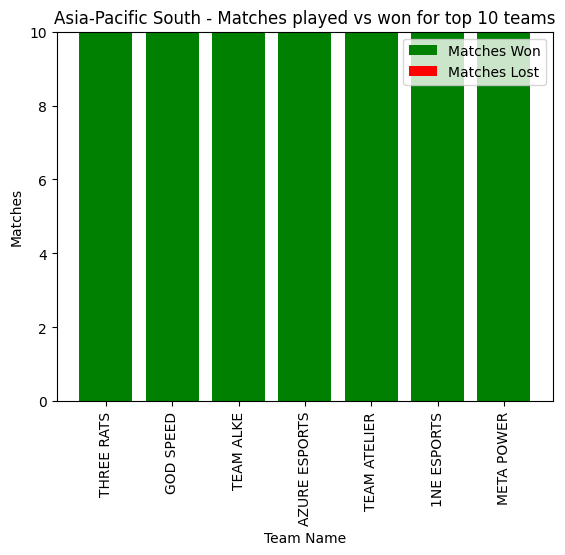

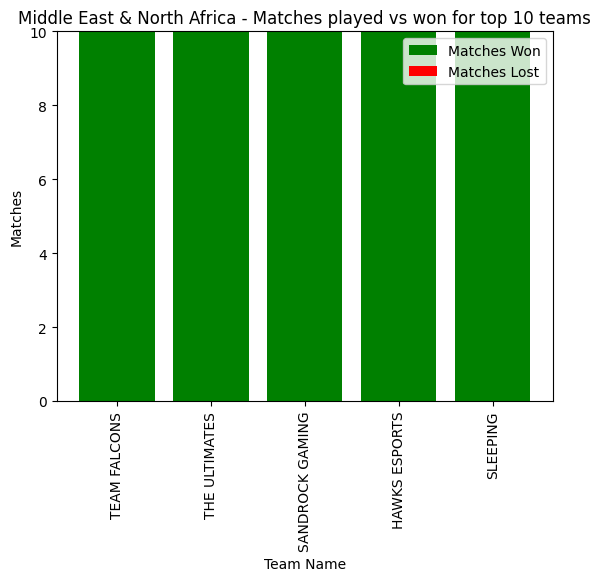

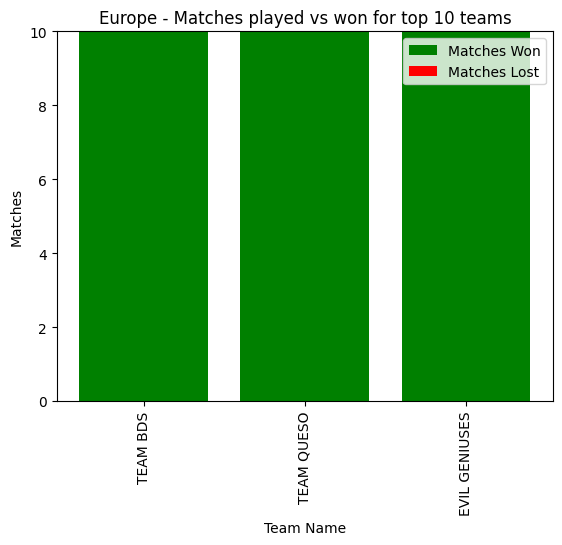

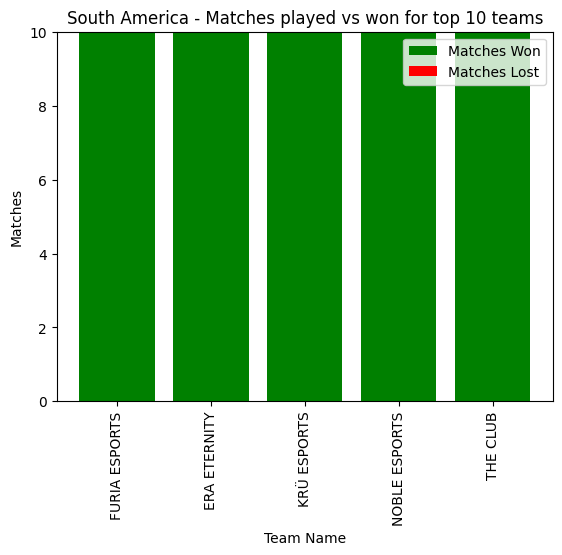

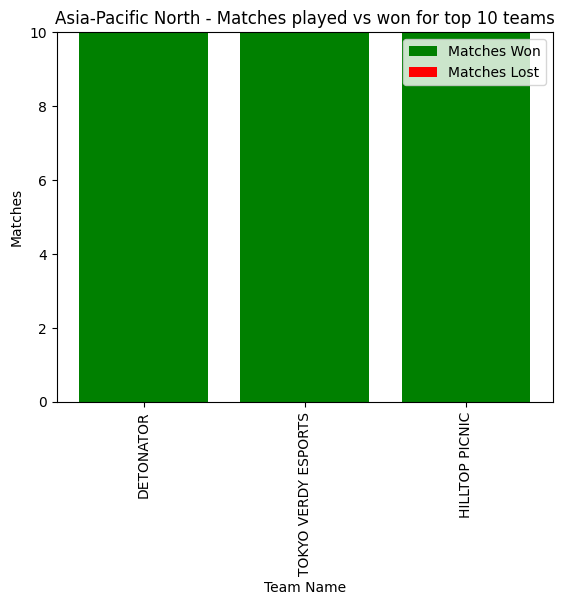

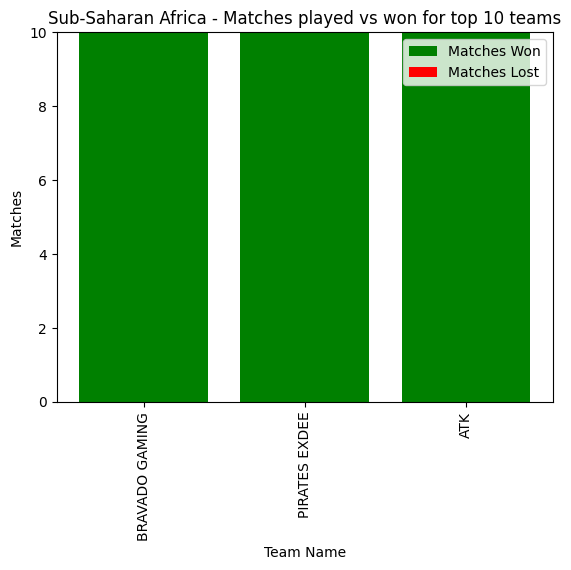

In [83]:
import matplotlib.pyplot as plt

regions = df['team_region'].unique()
for region in regions:
    region_df = df[df['team_region'] == region].sort_values(by='score', ascending=False)
    region_df = region_df.head(10)
    
    teams = region_df['team_name'].values
    matches_played = region_df['match_id'].nunique()
    matches_won = region_df[region_df['winner'] == True]['match_id'].nunique()
    
    fig, ax = plt.subplots()
    ax.bar(teams, matches_won, color='green')
    ax.bar(teams, matches_played - matches_won, bottom=matches_won, color='red')
    
    ax.set_title(f"{region} - Matches played vs won for top 10 teams")
    ax.set_xlabel("Team Name")
    ax.set_ylabel("Matches")
    ax.legend(["Matches Won", "Matches Lost"])
    plt.xticks(rotation=90)
    
plt.show()


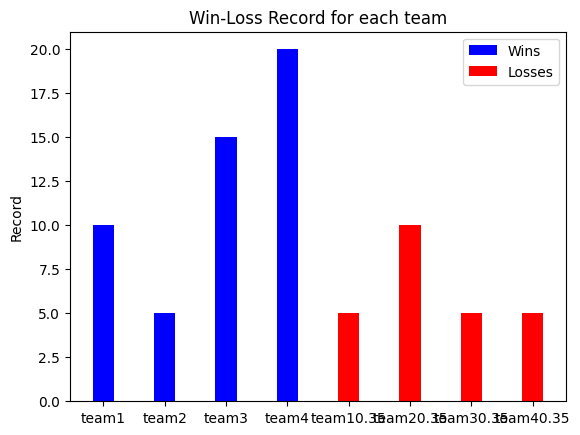

In [84]:
import matplotlib.pyplot as plt

# Define the teams and win-loss record
teams = ['team1', 'team2', 'team3', 'team4']
wins = [10, 5, 15, 20]
losses = [5, 10, 5, 5]

fig, ax = plt.subplots()
bar_width = 0.35
bar1 = ax.bar(teams, wins, bar_width, color='blue')
bar2 = ax.bar([x + str(bar_width) for x in teams], losses, bar_width, color='red')
ax.set_ylabel('Record')
ax.set_title('Win-Loss Record for each team')
ax.legend((bar1[0], bar2[0]), ('Wins', 'Losses'))

plt.show()


In [85]:
sum=0
for i in df['Mode'].unique():
  gz=df[(df['team_name']=='GROUND ZERO GAMING') & (df['Mode']==i)]
  sum+=gz['winner'].astype(bool).sum()
print(sum*3)

111


In [86]:
df.iloc[23,:]

Unnamed: 0                                                                         23
match_id                                                     6159ad3d143c37878b2384b4
color                                                                          orange
team_id                                                      6020bc8ef1e4807cc700391a
team_slug                             https://octane.gg/teams/391a-ground-zero-gaming
team_name                                                          GROUND ZERO GAMING
team_region                                                                   Oceania
core_shots                                                                       38.0
core_goals                                                                        6.0
core_saves                                                                       22.0
core_assists                                                                      4.0
core_score                                            

**Boost Collection for each team**

In [87]:
import plotly.express as px

In [88]:
import plotly.express as px

fig = px.scatter(df, x='boost_amount_collected', y='boost_amount_used_while_supersonic',
                 color='team_name', hover_data=['team_name'],
                 labels={'boost_amount_collected':'Boost Collection',
                         'boost_amount_used_while_supersonic':'Boost Usage',
                         'team_name': 'Team Name'},
                 title='Boost Collection vs Boost Usage',
                 width=960, height=720)

fig.add_vline(x=df['boost_amount_collected'].mean(), line_width=1, line_dash="dash")
fig.add_hline(y=df['boost_amount_used_while_supersonic'].mean(), line_width=1, line_dash="dash")

fig.show()


In [89]:
worlds=df.loc[df['Mode'] == 'World Championship']
worlds.count()

Unnamed: 0                            120
match_id                              120
color                                 120
team_id                               120
team_slug                             120
team_name                             120
team_region                           120
core_shots                            120
core_goals                            120
core_saves                            120
core_assists                          120
core_score                            120
core_shooting_percentage              120
boost_bpm                             120
boost_bcpm                            120
boost_avg_amount                      120
boost_amount_collected                120
boost_amount_stolen                   120
boost_amount_collected_big            120
boost_amount_stolen_big               120
boost_amount_collected_small          120
boost_amount_stolen_small             120
boost_count_collected_big             120
boost_count_stolen_big            

In [90]:
fig = px.scatter(worlds, x='boost_amount_collected', y='boost_amount_used_while_supersonic',
                 color='team_name', hover_data=['team_name'],
                 labels={'boost_amount_collected':'Boost Collection',
                         'boost_amount_used_while_supersonic':'Boost Usage',
                         'team_name': 'Team Name'},
                 title='Boost Collection vs Boost Usage',
                 width=960, height=720)

fig.add_vline(x=df['boost_amount_collected'].mean(), line_width=1, line_dash="dash")
fig.add_hline(y=df['boost_amount_used_while_supersonic'].mean(), line_width=1, line_dash="dash")

fig.show()


In [91]:
fig = px.bar(worlds, x='team_name', y='boost_amount_collected', color='boost_amount_used_while_supersonic',
             labels={'boost_amount_collected':'Boost Collection',
                     'boost_amount_used_while_supersonic':'Boost Usage',
                     'team_name': 'Team Name'},
             title='Boost Collection vs Boost Usage',
             width=960, height=720)

fig.show()


In [92]:
df.tail()

Unnamed: 0                  match_id   color                   team_id  \
10589       10589  62e02371da9d7ca1c7bb2f61  orange  6020bd98f1e4807cc700dc74   
10590       10590  62e02371da9d7ca1c7bb2f62    blue  6020bc70f1e4807cc70023a5   
10591       10591  62e02371da9d7ca1c7bb2f62  orange  605aca6853a71a78eacbc155   
10592       10592  62e02371da9d7ca1c7bb2f63    blue  6020bd98f1e4807cc700dc74   
10593       10593  62e02371da9d7ca1c7bb2f63  orange  6020bc70f1e4807cc70023a5   

                                     team_slug   team_name    team_region  \
10589    https://octane.gg/teams/dc74-team-bds    TEAM BDS         Europe   
10590  https://octane.gg/teams/23a5-g2-esports  G2 ESPORTS  North America   
10591   https://octane.gg/teams/c155-faze-clan   FAZE CLAN  North America   
10592    https://octane.gg/teams/dc74-team-bds    TEAM BDS         Europe   
10593  https://octane.gg/teams/23a5-g2-esports  G2 ESPORTS  North America   

       core_shots  core_goals  core_saves  ...  \
10589        61.0        18.0        29.0  ...   
10590        46.0        14.0        38.0  ...   
10591        50.0         5.0        26.0  ...   
10592        36.0        10.0        19.0  ...   
10593        33.0         5.0        21.0  ...   

       positioning_time_offensive_third  positioning_time_defensive_half  \
10589                           1516.41                          4201.51   
10590                           1243.93                          3871.85   
10591                           1341.10                          3731.48   
10592                            936.44                          3358.93   
10593                           1201.83                          3036.30   

       positioning_time_offensive_half  positioning_time_behind_ball  \
10589                          2630.25                       5280.76   
10590                          2162.11                       4417.79   
10591                          2281.36                       4300.44   
10592                          1685.25                       3816.52   
10593                          2034.62                       3517.24   

       positioning_time_in_front_ball  demo_inflicted  demo_taken  score  \
10589                         1550.99            19.0        13.0    4.0   
10590                         1616.17            22.0        15.0    4.0   
10591                         1712.41            15.0        22.0    2.0   
10592                         1227.65            11.0        21.0    4.0   
10593                         1553.67            21.0        11.0    1.0   

       winner                Mode  
10589    True  World Championship  
10590    True  World Championship  
10591   False  World Championship  
10592    True  World Championship  
10593   False  World Championship  

[5 rows x 56 columns]

In [93]:
import plotly.express as px

# filter data for Europe region
europe = df[df['team_region'] == 'Europe']

# pivot the data to have team_name as columns and positioning times as values
df_pivot = pd.pivot_table(europe, values=['positioning_time_neutral_third', 'positioning_time_offensive_third', 'positioning_time_offensive_half'],
index='team_name', aggfunc='mean')

fig = px.bar(df_pivot, x=df_pivot.index, y=['positioning_time_neutral_third', 'positioning_time_offensive_third', 'positioning_time_offensive_half'],
             labels={'positioning_time_neutral_third':'Positioning Time Neutral Third',
                     'positioning_time_offensive_third':'Positioning Time Offensive Third',
                     'positioning_time_offensive_half': 'Positioning Time Offensive Half',
                     'team_name':'Team Name'},width=700, height=520,
             title='Positioning Time Comparison for Europe Region')

fig.show()


In [94]:
regions = ['Oceania', 'North America', 'Asia-Pacific South','Middle East & North Africa', 'Europe', 'South America','Asia-Pacific North','Sub-Saharan Africa']

# Create a new column for total positioning time for each region
df['total_positioning_time'] = df['positioning_time_offensive_third'] + df['positioning_time_offensive_half']

for region in regions:
    region_df = df[df['team_region'] == region]
    region_df=region_df.sort_values(by='total_positioning_time', ascending=False)
    fig = px.bar(region_df, x='team_name', y='total_positioning_time',
                 color='team_name', hover_data=['team_name'],
                 labels={'total_positioning_time':'Total Positioning Time',
                         'team_name': 'Team Name'},width=1000, height=520,
                 title=f'Total Positioning Time for {region} Region')
    fig.show()


In [95]:
europe_teams = df[df['team_region'] == 'Europe']
fig = px.bar(europe_teams, x='team_name', y=['demo_inflicted', 'demo_taken'],
barmode='group',
labels={'demo_inflicted':'Demos Inflicted',
'demo_taken':'Demos Taken',
'team_name': 'Team Name'},width=700, height=520,
title='Demos Inflicted vs Demos Taken for Europe Teams')
fig.show()

In [96]:
region = 'Europe'
region_df = worlds[worlds['team_region'] == region]
region_df['total_demo'] = region_df['demo_inflicted'] + region_df['demo_taken']
region_df = region_df.sort_values(by='total_demo', ascending=False)

fig = px.bar(region_df, x='team_name', y=['demo_inflicted', 'demo_taken'], color='team_name',
             labels={'demo_inflicted':'Demos Inflicted',
                     'demo_taken':'Demos Taken',
                     'team_name': 'Team Name'},width=700, height=520,
             title=f'Demos Inflicted and Taken by Teams in {region} Region')

fig.show()


In [97]:
europe_teams = df[df['team_region'] == 'Europe']
europe_teams.sort_values(by='demo_taken', ascending=True, inplace=True)
fig = px.bar(europe_teams, x='team_name', y=['demo_inflicted', 'demo_taken'],
barmode='group',width=700, height=520,
labels={'demo_inflicted':'Demos Inflicted',
'demo_taken':'Demos Taken',
'team_name': 'Team Name'},
title='Demos Inflicted vs Demos Taken for Europe Teams')
fig.show()

In [98]:
regions = ['Oceania', 'North America', 'Asia-Pacific South',
'Middle East & North Africa', 'Europe', 'South America',
'Asia-Pacific North', 'Sub-Saharan Africa']

for region in regions:
  region_teams = df[df['team_region'] == region]
  fig = px.bar(region_teams, x='team_name', y=['demo_inflicted', 'demo_taken'],
  barmode='group',width=1000, height=520,
  labels={'demo_inflicted':'Demos Inflicted',
  'demo_taken':'Demos Taken',
  'team_name': 'Team Name'},
  title=f'Demos Inflicted vs Demos Taken for {region} Teams')
  fig.show()

In [99]:
europe_teams = df[df['team_region'] == 'Europe']
fig = px.bar(europe_teams, x='team_name', y='winner',
             labels={'winner':'Wins',
                     'team_name': 'Team Name'},width=1000, height=520,
             title='Wins for Europe Teams')
fig.show()

In [100]:
euro_teams = df[df['team_region'] == 'Europe']
team_wins = euro_teams.groupby('team_name')['winner'].sum().reset_index()


team_wins = team_wins.sort_values(by='winner', ascending=False)

fig = px.bar(team_wins, x='team_name', y='winner',
             labels={'team_name':'Team Name',
                         'winner': 'Wins'},width=700, height=520,
            hover_data=['team_name'], color='team_name',color_discrete_sequence=px.colors.sequential.BuGn)
fig.show()

In [101]:
regions_wins=df['team_region'].unique()
top_teams = pd.DataFrame()
for i in regions_wins:
  team = df[df['team_region'] == i]

  # Count the number of wins for each team
  team_wins = team.groupby('team_name')['winner'].sum().reset_index()
  # Sort the teams by number of wins
  team_wins = team_wins.sort_values(by='winner', ascending=False)
  top_10 = team_wins.head(10)
  top_teams = pd.concat([top_teams, team[team['team_name'].isin(top_10['team_name'])]])

  fig = px.bar(team_wins, x='team_name', y='winner',
              labels={'team_name':'Team Name',
                          'winner': 'Wins'},width=1000, height=520,
              hover_data=['team_name'], color='team_name',color_discrete_sequence=px.colors.sequential.RdPu_r,
               title=f'Wins for {i} Teams')
  fig.update_layout(xaxis_tickangle=-45)
  fig.show()


In [102]:
import plotly.subplots as sp
import plotly.express as px
import plotly.graph_objs as go
from sklearn.decomposition import PCA

In [103]:
top_teams.head()

Unnamed: 0                  match_id   color                   team_id  \
0           0  6159ad3d143c37878b2384a9    blue  6020bc8ef1e4807cc700391a   
2           2  6159ad3d143c37878b2384aa    blue  6020bc70f1e4807cc70023fb   
4           4  6159ad3d143c37878b2384ab    blue  6020bc8ef1e4807cc7003915   
7           7  6159ad3d143c37878b2384ac  orange  604e562301d675f81a96aea6   
8           8  6159ad3d143c37878b2384ad    blue  6020bec4f1e4807cc70163fc   

                                         team_slug           team_name  \
0  https://octane.gg/teams/391a-ground-zero-gaming  GROUND ZERO GAMING   
2           https://octane.gg/teams/23fb-renegades           RENEGADES   
4         https://octane.gg/teams/3915-dire-wolves         DIRE WOLVES   
7           https://octane.gg/teams/aea6-big-goose           BIG GOOSE   
8         https://octane.gg/teams/63fc-r-ot-gaming         R!OT GAMING   

  team_region  core_shots  core_goals  core_saves  ...  \
0     Oceania        34.0         9.0         8.0  ...   
2     Oceania        46.0        21.0        10.0  ...   
4     Oceania        46.0        12.0        13.0  ...   
7     Oceania        18.0         6.0        21.0  ...   
8     Oceania         NaN         NaN         NaN  ...   

   positioning_time_defensive_half  positioning_time_offensive_half  \
0                          1967.99                          1237.05   
2                          1972.65                          1505.61   
4                          2900.66                          1718.97   
7                          2309.80                          1104.88   
8                              NaN                              NaN   

   positioning_time_behind_ball  positioning_time_in_front_ball  \
0                       2339.78                          865.27   
2                       2616.06                          862.25   
4                       3444.64                         1174.96   
7                       2400.63                         1014.12   
8                           NaN                             NaN   

   demo_inflicted  demo_taken  score  winner        Mode  \
0             6.0         7.0    3.0    True  Regional 1   
2            11.0         7.0    3.0    True  Regional 1   
4            13.0         8.0    3.0    True  Regional 1   
7            11.0         8.0    0.0   False  Regional 1   
8             NaN         NaN    3.0    True  Regional 1   

   total_positioning_time  
0                 1970.50  
2                 2398.37  
4                 2717.91  
7                 1721.42  
8                     NaN  

[5 rows x 57 columns]

In [104]:
regions = ['Oceania', 'North America', 'Asia-Pacific South',
'Middle East & North Africa', 'Europe', 'South America',
'Asia-Pacific North', 'Sub-Saharan Africa']

for region in regions:
  region_teams = top_teams[top_teams['team_region'] == region]
  fig = px.bar(region_teams, x='team_name', y=['demo_inflicted', 'demo_taken'],
  barmode='group',
  labels={'demo_inflicted':'Demos Inflicted',
  'demo_taken':'Demos Taken',
  'team_name': 'Team Name'},width=1000, height=520,
  title=f'Demos Inflicted vs Demos Taken for {region} Teams')
  fig.show()

In [105]:
regions = ['Oceania', 'North America', 'Asia-Pacific South',
'Middle East & North Africa', 'Europe', 'South America',
'Asia-Pacific North', 'Sub-Saharan Africa']

for region in regions:
  region_teams = top_teams[top_teams['team_region'] == region]
  fig = px.scatter(region_teams, x='team_name', y=['demo_inflicted', 'demo_taken'],
  labels={'demo_inflicted':'Demos Inflicted',
  'demo_taken':'Demos Taken',
  'team_name': 'Team Name'},width=1000, height=520,
  title=f'Demos Inflicted vs Demos Taken for {region} Teams')
  fig.show()

In [106]:
top_teams['total_defensive_time'] = top_teams['positioning_time_defensive_third'] + top_teams['positioning_time_defensive_half']

In [107]:
for region in regions:
    region_df = top_teams[top_teams['team_region'] == region]
    grouped = region_df.groupby('team_name').agg({'total_positioning_time': 'sum',
    'total_defensive_time': 'sum'})
    grouped = grouped.reset_index()
    grouped = grouped.sort_values(by='total_positioning_time', ascending=False)
    print(grouped.head())
    fig = px.bar(grouped, x='team_name', y=['total_positioning_time','total_defensive_time'],
                  hover_data=['team_name'],width=1000, height=520,
                 labels={'total_positioning_time':'Total Positioning Time',
                         'team_name': 'Team Name'},
                 title=f'Total Positioning Time for {region} Region')
    fig.show()
    break


            team_name  total_positioning_time  total_defensive_time
8           RENEGADES               204617.79             357966.77
4  GROUND ZERO GAMING               136694.72             241125.60
2         DIRE WOLVES               121055.86             255116.78
3           FORKIDDEN               114312.75             215488.63
9          TEAM BLISS               112623.26             228883.91


In [108]:
for region in regions:
    region_df = top_teams[top_teams['team_region'] == region]
    grouped = region_df.groupby('team_name').agg({'total_positioning_time': 'sum',
    'total_defensive_time': 'sum'})
    grouped = grouped.reset_index()
    grouped = grouped.sort_values(by='total_positioning_time', ascending=False)
    fig = px.bar(grouped, x='team_name', y=['total_positioning_time','total_defensive_time'],
                 barmode='group',
                 labels={'total_positioning_time':'Total Offensive Time',
                         'total_defensive_time': 'Total Offensive Time',
                         'team_name': 'Team Name'},width=1000, height=520,
                 title=f'Total Offensive and Defensive Positioning Time for {region} Region')
    fig.show()



In [109]:
top_teams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4082 entries, 0 to 10529
Data columns (total 58 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          4082 non-null   int64  
 1   match_id                            4082 non-null   object 
 2   color                               4082 non-null   object 
 3   team_id                             4082 non-null   object 
 4   team_slug                           4082 non-null   object 
 5   team_name                           4082 non-null   object 
 6   team_region                         4082 non-null   object 
 7   core_shots                          3733 non-null   float64
 8   core_goals                          3733 non-null   float64
 9   core_saves                          3733 non-null   float64
 10  core_assists                        3733 non-null   float64
 11  core_score                          3733 n

In [110]:
df_europe = df[df["team_region"] == "Europe"]
df_europe_agg = df_europe.groupby("team_name").agg({"movement_time_ground": "sum", "movement_time_low_air": "sum", "movement_time_high_air": "sum"}).reset_index()

fig = px.bar(df_europe_agg, x="team_name", y=["movement_time_ground", "movement_time_low_air", "movement_time_high_air"], barmode="group",width=1200, height=520)
fig.show()



In [111]:
df_europe = top_teams[top_teams["team_region"] == "Europe"]
df_europe['movement_time'] = df_europe['movement_time_low_air'] + df_europe['movement_time_high_air']

df_europe_agg = df_europe.groupby("team_name").agg({"movement_time_ground": "sum", "movement_time": "sum"}).reset_index()

fig = px.line(df_europe_agg, x="team_name", y=["movement_time_ground", "movement_time"],markers=True,width=1200, height=520)
fig['data'][0]['line']['color']='rgb(235, 116, 52)'
fig['data'][0]['line']['width']=3
fig['data'][1]['line']['color']='rgb(103, 38, 224)'
fig['data'][1]['line']['width']=3
fig.show()

In [112]:
for region in regions:
    df_region = top_teams[top_teams["team_region"] == region]
    df_region['movement_time_air'] = df_region['movement_time_low_air'] + df_region['movement_time_high_air']

    df_region_agg = df_region.groupby("team_name").agg({"movement_time_ground": "sum", "movement_time_air": "sum"}).reset_index()

    fig = px.line(df_region_agg, x="team_name", y=["movement_time_ground", "movement_time_air"], markers=True,
                  labels={'movement_time_ground':'Total Ground Time',
                         'movement_time_air': 'Total Air Time',
                         'team_name': 'Team Name'},width=1200, height=520)
    fig['data'][0]['line']['color'] = 'rgb(235, 116, 52)'
    fig['data'][0]['line']['width'] = 3
    fig['data'][1]['line']['color'] = 'rgb(103, 38, 224)'
    fig['data'][1]['line']['width'] = 3
    fig.update_layout(title=f"{region} Teams : Total Movement Time Ground vs Total Movement Time Air")
    fig.show()


In [113]:
df_agg = top_teams.groupby("team_region").agg({"score": "sum"}).reset_index()

fig = px.pie(df_agg, values='score', names='team_region',title=f'Score',width=960, height=720)
fig.show()


In [114]:
from sklearn.cluster import KMeans

df_europe = top_teams[top_teams['team_region'] == 'Europe']
df_europe=df_europe.dropna()

df_europe = df_europe.iloc[:, 7:54]


kmeans = KMeans(n_clusters=3)
kmeans.fit(df_europe)

# Get the cluster labels
labels = kmeans.labels_
df_europe['cluster'] = labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [115]:
df = top_teams[top_teams["team_region"] == "Europe"]

# Select columns 5 to 53
df = df.iloc[:, 7:54]

# Fill missing values with 0
df.fillna(0, inplace=True)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

# Add the cluster labels to the dataframe
df["cluster"] = kmeans.labels_
df["team_name"] = top_teams["team_name"]
df["Region"] = top_teams["team_region"]

# Plot the results using Plotly
fig = px.scatter(df, x=df.iloc[:, 0], y=df.iloc[:, 1], color="cluster",hover_data=['team_name','Region'])
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [116]:
df = top_teams
df = df.iloc[:, 7:54]

df.fillna(0, inplace=True)

grouped = df.groupby(top_teams['team_name']).mean()

kmeans = KMeans(n_clusters=3)
kmeans.fit(grouped)

team_region_dict = dict(zip(top_teams["team_name"], top_teams["team_region"]))

grouped["cluster"] = kmeans.labels_
grouped["team_name"] = grouped.index
grouped["Region"] = grouped["team_name"].map(team_region_dict)

fig = px.scatter(grouped, x=grouped.iloc[:, 0], y=grouped.iloc[:, 1], color="cluster", width=1200, height=520,
                 hover_data=['team_name', 'Region'],color_continuous_scale=px.colors.sequential.Bluered)
fig.update_layout(title_text='K Means',title_x=0.5)
fig.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [124]:
df = top_teams

df = df.iloc[:, 7:54]

df.fillna(0, inplace=True)


grouped = df.groupby(top_teams['team_name']).mean()

wcss = []

# Iterate over a range of cluster numbers and fit KMeans to the grouped data
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,n_init=10)
    kmeans.fit(grouped)
    wcss.append(kmeans.inertia_)

fig = px.line(x=(range(1, 11)), y=wcss, labels={'x': 'Number of Clusters', 'y': 'Within-Cluster Sum of Squares'})
fig.show()


In [125]:
grouped

core_shots  core_goals  core_saves  core_assists  \
team_name                                                            
00 NATION          31.623188    7.362319   21.869565      5.985507   
25ESPORTS          18.052632    4.754386    9.877193      3.982456   
AIPX GAMING        31.512195    9.658537   12.878049      8.121951   
ALOHA              28.793103    8.172414   13.241379      6.224138   
ANKAA              31.180000    8.120000   16.260000      6.400000   
...                      ...         ...         ...           ...   
VERSION1           33.688312    7.792208   21.233766      6.155844   
VIPERS ESPORTS     24.766667    5.666667   16.616667      4.350000   
WILLIAMS RESOLVE   33.032258    6.854839   22.241935      5.677419   
XAYFHERS           28.130435    8.086957   14.695652      6.347826   
YOU'RE THROWING    28.911111    7.266667   17.600000      5.577778   

                   core_score  core_shooting_percentage    boost_bpm  \
team_name                                                              
00 NATION         4581.666667                 23.677410  4893.217391   
25ESPORTS         2425.526316                 14.886672  2802.175439   
AIPX GAMING       4066.731707                 29.027351  4384.073171   
ALOHA             3722.689655                 25.061677  3928.086207   
ANKAA             3928.120000                 22.500145  4302.800000   
...                       ...                       ...          ...   
VERSION1          4672.051948                 22.572906  5093.077922   
VIPERS ESPORTS    3487.050000                 17.802842  3770.616667   
WILLIAMS RESOLVE  4697.225806                 20.724238  4846.629032   
XAYFHERS          3998.239130                 27.568144  4530.717391   
YOU'RE THROWING   3986.200000                 23.864461  4781.133333   

                   boost_bcpm  boost_avg_amount  boost_amount_collected  ...  \
team_name                                                                ...   
00 NATION         5011.037774        576.649420            30026.782609  ...   
25ESPORTS         2872.406452        306.283860            16693.175439  ...   
AIPX GAMING       4540.867180        508.021220            26340.902439  ...   
ALOHA             4085.377149        503.818103            24010.017241  ...   
ANKAA             4483.624616        492.961600            25876.020000  ...   
...                       ...               ...                     ...  ...   
VERSION1          5173.469324        572.309221            30094.129870  ...   
VIPERS ESPORTS    3906.225009        491.600500            23177.233333  ...   
WILLIAMS RESOLVE  4989.438966        635.178710            30525.532258  ...   
XAYFHERS          4684.565944        564.564130            27149.717391  ...   
YOU'RE THROWING   4859.224436        526.655556            27994.511111  ...   

                  positioning_time_defensive_third  \
team_name                                            
00 NATION                              2141.378261   
25ESPORTS                              1106.587018   
AIPX GAMING                            1745.277317   
ALOHA                                  1765.365862   
ANKAA                                  1621.463200   
...                                            ...   
VERSION1                               2125.660909   
VIPERS ESPORTS                         1711.561167   
WILLIAMS RESOLVE                       2263.250000   
XAYFHERS                               1940.931087   
YOU'RE THROWING                        1910.472889   

                  positioning_time_neutral_third  \
team_name                                          
00 NATION                            1458.652754   
25ESPORTS                             779.637895   
AIPX GAMING                          1345.121220   
ALOHA                                1228.208966   
ANKAA                                1197.010400   
...                                          ...   
VERSION1  

In [126]:
grouped_with_cluster = grouped.reset_index()
grouped_with_cluster

team_name  core_shots  core_goals  core_saves  core_assists  \
0          00 NATION   31.623188    7.362319   21.869565      5.985507   
1          25ESPORTS   18.052632    4.754386    9.877193      3.982456   
2        AIPX GAMING   31.512195    9.658537   12.878049      8.121951   
3              ALOHA   28.793103    8.172414   13.241379      6.224138   
4              ANKAA   31.180000    8.120000   16.260000      6.400000   
..               ...         ...         ...         ...           ...   
75          VERSION1   33.688312    7.792208   21.233766      6.155844   
76    VIPERS ESPORTS   24.766667    5.666667   16.616667      4.350000   
77  WILLIAMS RESOLVE   33.032258    6.854839   22.241935      5.677419   
78          XAYFHERS   28.130435    8.086957   14.695652      6.347826   
79   YOU'RE THROWING   28.911111    7.266667   17.600000      5.577778   

     core_score  core_shooting_percentage    boost_bpm   boost_bcpm  \
0   4581.666667                 23.677410  4893.217391  5011.037774   
1   2425.526316                 14.886672  2802.175439  2872.406452   
2   4066.731707                 29.027351  4384.073171  4540.867180   
3   3722.689655                 25.061677  3928.086207  4085.377149   
4   3928.120000                 22.500145  4302.800000  4483.624616   
..          ...                       ...          ...          ...   
75  4672.051948                 22.572906  5093.077922  5173.469324   
76  3487.050000                 17.802842  3770.616667  3906.225009   
77  4697.225806                 20.724238  4846.629032  4989.438966   
78  3998.239130                 27.568144  4530.717391  4684.565944   
79  3986.200000                 23.864461  4781.133333  4859.224436   

    boost_avg_amount  ...  positioning_time_defensive_third  \
0         576.649420  ...                       2141.378261   
1         306.283860  ...                       1106.587018   
2         508.021220  ...                       1745.277317   
3         503.818103  ...                       1765.365862   
4         492.961600  ...                       1621.463200   
..               ...  ...                               ...   
75        572.309221  ...                       2125.660909   
76        491.600500  ...                       1711.561167   
77        635.178710  ...                       2263.250000   
78        564.564130  ...                       1940.931087   
79        526.655556  ...                       1910.472889   

    positioning_time_neutral_third  positioning_time_offensive_third  \
0                      1458.652754                        854.582174   
1                       779.637895                        506.278246   
2                      1345.121220                        931.231951   
3                      1228.208966                        787.325000   
4                      1197.010400                        815.974200   
..                             ...                               ...   
75                     1360.904286                        838.231688   
76                     1112.829167                        692.746333   
77                     1529.632903                        916.886774   
78                     1354.643913                        812.385000   
79                     1247.843778                        818.243333   

    positioning_time_defensive_half  positioning_time_offensive_half  \
0                       2937.452899                      1517.151884   
1                       1514.989825                       877.510526   
2                       2444.391463                      1577.226098   
3                       2415.687931                      1365.206552   
4                       2243.158800                      1391.280800   
..                              ...                              ...   
75                      2860.204286                      1464.591039   
76                      2313.877500                      1203.250833   

In [127]:
import scipy.cluster.hierarchy as shc
import plotly.figure_factory as ff

linkage_matrix = shc.linkage(grouped, method='ward')
fig = ff.create_dendrogram(linkage_matrix, color_threshold=0)
fig.show()

# dendrogram = shc.dendrogram(shc.linkage(grouped, method='ward'))
# fig = ff.create_dendrogram(dendrogram, color_threshold=0)
# fig.update_layout(title_text='Dendrogram')
# fig.show()

In [128]:
df = top_teams
df = df.iloc[:, 7:54]

df.fillna(0, inplace=True)

grouped = df.groupby(top_teams['team_name']).mean()

# Fit KMeans to the grouped data with number of clusters = 3
kmeans = KMeans(n_clusters=3)
kmeans.fit(grouped)

team_region_dict = dict(zip(top_teams["team_name"], top_teams["team_region"]))
# Add the cluster labels to the grouped data
grouped["cluster"] = kmeans.labels_
grouped["team_name"] = grouped.index
grouped["Region"] = grouped["team_name"].map(team_region_dict)

# Group the data by region
grouped_by_region = grouped.groupby('Region').agg({'cluster': lambda x: x.mode()[0]})

grouped_by_region.reset_index(inplace=True)

print(grouped_by_region)

                       Region  cluster
0          Asia-Pacific North        2
1          Asia-Pacific South        2
2                      Europe        0
3  Middle East & North Africa        0
4               North America        0
5                     Oceania        2
6               South America        1
7          Sub-Saharan Africa        0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [129]:
grouped_by_region

Region  cluster
0          Asia-Pacific North        2
1          Asia-Pacific South        2
2                      Europe        0
3  Middle East & North Africa        0
4               North America        0
5                     Oceania        2
6               South America        1
7          Sub-Saharan Africa        0

In [130]:
df_regions = grouped[["Region", "cluster"]]
fig = px.scatter(df_regions, x="Region", y="cluster", color="cluster", width=1200, height=520)
fig.update_layout(title_text='Regions and Clusters',title_x=0.5)
fig.show()

In [131]:
grouped

core_shots  core_goals  core_saves  core_assists  \
team_name                                                            
00 NATION          31.623188    7.362319   21.869565      5.985507   
25ESPORTS          18.052632    4.754386    9.877193      3.982456   
AIPX GAMING        31.512195    9.658537   12.878049      8.121951   
ALOHA              28.793103    8.172414   13.241379      6.224138   
ANKAA              31.180000    8.120000   16.260000      6.400000   
...                      ...         ...         ...           ...   
VERSION1           33.688312    7.792208   21.233766      6.155844   
VIPERS ESPORTS     24.766667    5.666667   16.616667      4.350000   
WILLIAMS RESOLVE   33.032258    6.854839   22.241935      5.677419   
XAYFHERS           28.130435    8.086957   14.695652      6.347826   
YOU'RE THROWING    28.911111    7.266667   17.600000      5.577778   

                   core_score  core_shooting_percentage    boost_bpm  \
team_name                                                              
00 NATION         4581.666667                 23.677410  4893.217391   
25ESPORTS         2425.526316                 14.886672  2802.175439   
AIPX GAMING       4066.731707                 29.027351  4384.073171   
ALOHA             3722.689655                 25.061677  3928.086207   
ANKAA             3928.120000                 22.500145  4302.800000   
...                       ...                       ...          ...   
VERSION1          4672.051948                 22.572906  5093.077922   
VIPERS ESPORTS    3487.050000                 17.802842  3770.616667   
WILLIAMS RESOLVE  4697.225806                 20.724238  4846.629032   
XAYFHERS          3998.239130                 27.568144  4530.717391   
YOU'RE THROWING   3986.200000                 23.864461  4781.133333   

                   boost_bcpm  boost_avg_amount  boost_amount_collected  ...  \
team_name                                                                ...   
00 NATION         5011.037774        576.649420            30026.782609  ...   
25ESPORTS         2872.406452        306.283860            16693.175439  ...   
AIPX GAMING       4540.867180        508.021220            26340.902439  ...   
ALOHA             4085.377149        503.818103            24010.017241  ...   
ANKAA             4483.624616        492.961600            25876.020000  ...   
...                       ...               ...                     ...  ...   
VERSION1          5173.469324        572.309221            30094.129870  ...   
VIPERS ESPORTS    3906.225009        491.600500            23177.233333  ...   
WILLIAMS RESOLVE  4989.438966        635.178710            30525.532258  ...   
XAYFHERS          4684.565944        564.564130            27149.717391  ...   
YOU'RE THROWING   4859.224436        526.655556            27994.511111  ...   

                  positioning_time_defensive_half  \
team_name                                           
00 NATION                             2937.452899   
25ESPORTS                             1514.989825   
AIPX GAMING                           2444.391463   
ALOHA                                 2415.687931   
ANKAA                                 2243.158800   
...                                           ...   
VERSION1                              2860.204286   
VIPERS ESPORTS                        2313.877500   
WILLIAMS RESOLVE                      3073.231935   
XAYFHERS                              2654.387391   
YOU'RE THROWING                       2569.145333   

                  positioning_time_offensive_half  \
team_name                                           
00 NATION                             1517.151884   
25ESPORTS                              877.510526   
AIPX GAMING                           1577.226098   
ALOHA                                 1365.206552   
ANKAA                                 1391.280800   
...                                           ...   
VERSION1       

In [132]:
df = grouped[["Region", "cluster"]].drop_duplicates()
df = df.pivot(index="Region", columns="cluster", values="cluster")
df.fillna(0, inplace=True)
df = df.astype(int)
print(df.head())

cluster                     0  1  2
Region                             
Asia-Pacific North          0  1  2
Asia-Pacific South          0  1  2
Europe                      0  0  2
Middle East & North Africa  0  1  2
North America               0  0  2


In [133]:
tot=[]
print(regions)
for region in regions:
  list=[0,0,0]
  me=grouped[grouped['Region']==region]
  # print(me.head())
  for value in me['cluster']:
    list[value-1]+=1
  tot.append(list)


['Oceania', 'North America', 'Asia-Pacific South', 'Middle East & North Africa', 'Europe', 'South America', 'Asia-Pacific North', 'Sub-Saharan Africa']


In [134]:
res = pd.DataFrame(tot, columns=['Cluster 1', 'Cluster 2', 'Cluster 3'])
res.index = regions
res

Cluster 1  Cluster 2  Cluster 3
Oceania                             1          5          4
North America                       0          5          5
Asia-Pacific South                  2          5          3
Middle East & North Africa          3          3          4
Europe                              0          2          8
South America                       5          1          4
Asia-Pacific North                  2          5          3
Sub-Saharan Africa                  3          3          4

In [135]:
fig = px.bar(res, x=res.index, y=['Cluster 1', 'Cluster 2', 'Cluster 3'], barmode='group',width=800, height=520)
fig.update_layout(title_text='Regions and Clustering',title_x=0.5)
fig.show()


In [136]:
top_teams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4082 entries, 0 to 10529
Data columns (total 58 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          4082 non-null   int64  
 1   match_id                            4082 non-null   object 
 2   color                               4082 non-null   object 
 3   team_id                             4082 non-null   object 
 4   team_slug                           4082 non-null   object 
 5   team_name                           4082 non-null   object 
 6   team_region                         4082 non-null   object 
 7   core_shots                          3733 non-null   float64
 8   core_goals                          3733 non-null   float64
 9   core_saves                          3733 non-null   float64
 10  core_assists                        3733 non-null   float64
 11  core_score                          3733 n

In [137]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


ml=top_teams.dropna()

X = ml.iloc[:, 7:53].values
y = ml['score'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit the linear regression model to the training data
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict the scores using the test data
y_pred = regressor.predict(X_test)

# Calculate the mean squared error between the actual and predicted scores
mse = np.mean((y_test - y_pred)**2)
print("Mean Squared Error:", mse)

# Plot the actual vs predicted scores
fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_pred, mode='markers', name='Actual vs Predicted'))
fig.update_layout(title='Actual vs Predicted Scores', xaxis_title='Actual Scores', yaxis_title='Predicted Scores')
fig.show()

# Plot the residuals
residuals = y_test - y_pred
fig = px.histogram(residuals, nbins=30)
fig.update_layout(title='Residuals Histogram', xaxis_title='Residuals', yaxis_title='Count')
fig.show()

Mean Squared Error: 0.4219228925527801


**ML Model to predict outcome of a match**

In [139]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


df = pd.read_csv("/content/preprocessed_matches_by_teams.csv")
# Convert team_name and team_region to one-hot encoded columns
df = pd.get_dummies(df, columns=["team_name", "team_region"])
# Remove columns not useful for prediction
df.drop(["match_id", "color", "team_id", "team_slug", "Mode"], axis=1, inplace=True)
df.fillna(df.mean(), inplace=True)


X = df.drop("winner", axis=1)
y = df["winner"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

def predict_winner(team1, team2):
  # Get the data for the two teams
  team1_data = df[df['team_name_' + team1] == 1]
  team2_data = df[df['team_name_' + team2] == 1]
  X1 = team1_data.drop(columns=['winner'])
  X2 = team2_data.drop(columns=['winner'])
  X = pd.concat([X1, X2], axis=0)
  # Predict the winner
  y_pred = clf.predict(X)
  # Return the predicted winner
  if y_pred[0] == 1:
    return team1
  else:
    return team2



Accuracy: 0.9891458235016517


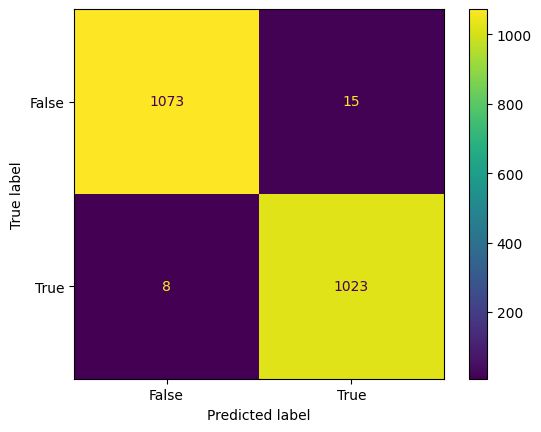

In [140]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [141]:
team1 = 'JUICERS'
team2 = 'PULSE CLAN'
winner = predict_winner(team1, team2)
print(f"The predicted winner between {team1} and {team2} is {winner}.")

The predicted winner between JUICERS and PULSE CLAN is PULSE CLAN.
